<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/PG/%EC%A7%80%EA%B2%8C%EC%B0%A8%EC%99%80_%ED%81%AC%EB%A0%88%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지게차와 크레인

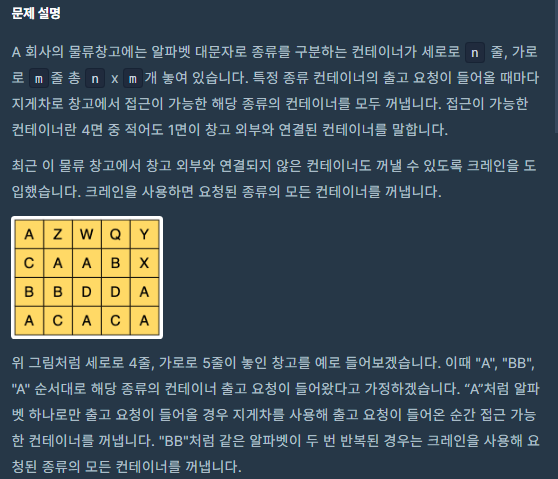

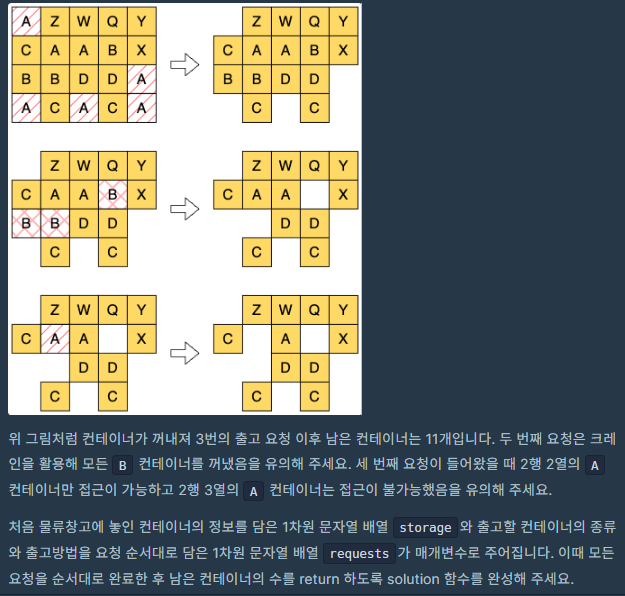

## 입력 출력 및 예제


* 입력

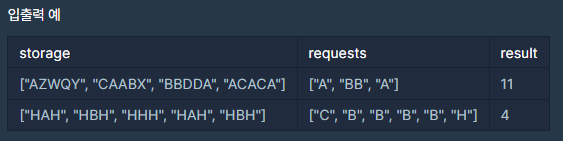

* 출력

* 예제

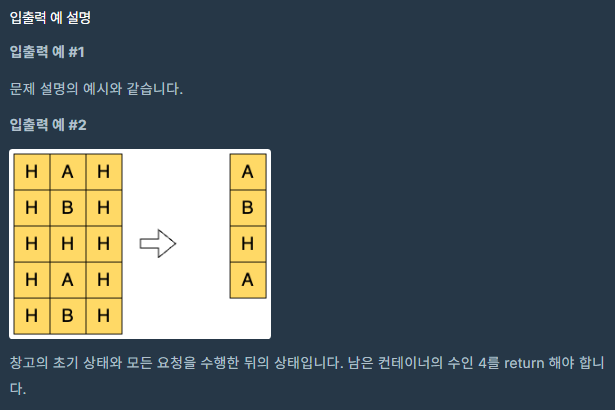

## 구상

-

## 코드

In [28]:
def accessible_box(storage, x,y):
    if x == 0 or x == len(storage) - 1 or y == 0 or y == len(storage[0]) - 1:
        return True

    if storage[x-1][y] == 0 or storage[x+1][y] == 0 or storage[x][y-1] == 0 or storage[x][y+1] == 0:
        return True

    return False

In [54]:
def can_reach(storage, x, y):
    from collections import deque

    H, W = len(storage), len(storage[0])
    visited = [[False]*W for _ in range(H)]
    q = deque()

    # 가장자리라면 바로 가능
    if x == 0 or x == len(storage) - 1 or y == 0 or y == len(storage[0]) - 1:
        return True

    # 가장자리의 0을 시작점으로 BFS
    for i in range(H):
        for j in range(W):
            if (i == 0 or i == H-1 or j == 0 or j == W-1) and storage[i][j] == 0:
                q.append((i, j))
                visited[i][j] = True

    dx = [-1,1,0,0]
    dy = [0,0,-1,1]

    while q:
        cx, cy = q.popleft() # current
        for d in range(4):
            nx, ny = cx+dx[d], cy+dy[d]
            if 0 <= nx < H and 0 <= ny < W:
                if not visited[nx][ny] and storage[nx][ny] == 0:
                    visited[nx][ny] = True
                    q.append((nx, ny))

    # (x, y)에서 상하좌우 중 하나라도 visited=True면 접근 가능
    for d in range(4):
        nx, ny = x + dx[d], y + dy[d]
        if 0 <= nx < H and 0 <= ny < W and visited[nx][ny]:
            return True
    return False


In [73]:
import copy

def can_reach(storage, x, y):
    from collections import deque

    H, W = len(storage), len(storage[0])
    visited = [[False]*W for _ in range(H)]
    q = deque()

    # 가장자리라면 바로 가능
    if x == 0 or x == len(storage) - 1 or y == 0 or y == len(storage[0]) - 1:
        return True

    # 가장자리의 0을 시작점으로 BFS
    for i in range(H):
        for j in range(W):
            if (i == 0 or i == H-1 or j == 0 or j == W-1) and storage[i][j] == 0:
                q.append((i, j))
                visited[i][j] = True

    dx = [-1,1,0,0]
    dy = [0,0,-1,1]

    while q:
        cx, cy = q.popleft() # current
        for d in range(4):
            nx, ny = cx+dx[d], cy+dy[d]
            if 0 <= nx < H and 0 <= ny < W:
                if not visited[nx][ny] and storage[nx][ny] == 0:
                    visited[nx][ny] = True
                    q.append((nx, ny))

    # (x, y)에서 상하좌우 중 하나라도 visited=True면 접근 가능
    for d in range(4):
        nx, ny = x + dx[d], y + dy[d]
        if 0 <= nx < H and 0 <= ny < W and visited[nx][ny]:
            return True
    return False


def solution(storage, requests):
    moved_box = 0

    new_storage = []
    for T in storage:
        new_storage.append(list(T))
    storage = new_storage
    print("스토리지:",storage)

    H = len(storage)
    W = len(storage[0])

    for r in requests:
        temp_storage = copy.deepcopy(storage)
        print("{} 요청".format(r))
        if len(r) == 1:
            for x in range(H):
                for y in range(W):
                    if storage[x][y] == r and can_reach(storage, x, y):
                        print('{}{}'.format(x,y))
                        temp_storage[x][y] = 0
                        moved_box += 1

        elif len(r) == 2:
            for x in range(H):
                for y in range(W):
                    if storage[x][y] == r[0]:
                        temp_storage[x][y] = 0
                        moved_box += 1
        storage = temp_storage

        print("제거된 박스 개수:",moved_box)
    print('최종 스토리지:',storage)
    answer = H*W - moved_box
    return answer

In [74]:
s = ["AZWQY", "CAABX", "BBDDA", "ACACA"]
r = ["A","BB","A"]

s1 = ["HAH", "HBH", "HHH", "HAH", "HBH"]
r1 = ["C", "B", "B", "B", "B", "H"]

In [75]:
solution(s,r)

스토리지: [['A', 'Z', 'W', 'Q', 'Y'], ['C', 'A', 'A', 'B', 'X'], ['B', 'B', 'D', 'D', 'A'], ['A', 'C', 'A', 'C', 'A']]
A 요청
00
24
30
32
34
제거된 박스 개수: 5
BB 요청
제거된 박스 개수: 8
A 요청
11
제거된 박스 개수: 9
최종 스토리지: [[0, 'Z', 'W', 'Q', 'Y'], ['C', 0, 'A', 0, 'X'], [0, 0, 'D', 'D', 0], [0, 'C', 0, 'C', 0]]


11

In [38]:
a = ['1','2']
a[0] = 0
a

[0, '2']

3

### 메모

- 논리적으로 문제가 없어보였는데. 얕은 복사가 문제였다. 조심하자